In [1]:
##*#-*- encoding: utf-8 -*-
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Data Loading
try:
    all_data = pd.read_csv("./input.csv")
except:
    all_data = pd.read_csv("./input.csv", encoding = "ISO-8859-1")

## Discover the head of your data
all_data.head()


,thickness,RE,Umach,AOA,Cl,Cdt,Cdp,Cdf,Cm
0,9,100000.0,0.05,0.0,-7.530000e-09,0.0144,0.00274,0.0116,4.000000e-10
1,9,100000.0,0.05,1.0,1.050644e-01,0.0145,0.00289,0.0116,-8.200000e-04
2,9,100000.0,0.05,2.0,2.097556e-01,0.0147,0.00337,0.0114,-1.660000e-03
3,9,100000.0,0.05,3.0,3.136829e-01,0.0153,0.00418,0.0111,-2.560000e-03
4,9,100000.0,0.05,4.0,4.163109e-01,0.0160,0.00539,0.0106,-3.570000e-03


In [3]:
## Pre-processing - 1. Inpute Missing values
## There are many options in order to deal with a missing value such as:
## - A constant value that has meaning within the domain, such as 0, distinct from all other values.
## - A value from another randomly selected record.
## - A mean, median or mode value for the column.
## - A value estimated by another predictive model.
## We are going to replace a missing value to 0 for numeric columns and 'empty' for string columns, respectively.

## Filling for missing values
categorical_columns_list = []
for each in all_data.columns:
    if all_data[each].dtypes != 'int64':
        if all_data[each].dtypes != 'float64':
            categorical_columns_list.append(each)
for item in categorical_columns_list:
    all_data[item].fillna("empty",inplace=True)
all_data.fillna(0, inplace=True)


In [4]:
##* Pre-processing - 2. Vectorization
## Numeric data only. There is nothing to be vectorized.
converted_key_list = []

## Converted data frame
all_data.head()


,thickness,RE,Umach,AOA,Cl,Cdt,Cdp,Cdf,Cm
0,9,100000.0,0.05,0.0,-7.530000e-09,0.0144,0.00274,0.0116,4.000000e-10
1,9,100000.0,0.05,1.0,1.050644e-01,0.0145,0.00289,0.0116,-8.200000e-04
2,9,100000.0,0.05,2.0,2.097556e-01,0.0147,0.00337,0.0114,-1.660000e-03
3,9,100000.0,0.05,3.0,3.136829e-01,0.0153,0.00418,0.0111,-2.560000e-03
4,9,100000.0,0.05,4.0,4.163109e-01,0.0160,0.00539,0.0106,-3.570000e-03


In [5]:
##* Listing features and scaling datasets
from sklearn.preprocessing import StandardScaler
column_list = ['Cl', 'AOA', 'Umach', 'RE', 'thickness']
features = ['AOA', 'Umach', 'RE', 'thickness']
target = 'Cdt'


In [6]:
##* Auto correction
column_list_old = column_list.copy()
features_old = features.copy()
mod_column_list = []
mod_features = []
if converted_key_list is not None:
    for keys, values in converted_key_list:
        for item in column_list:
            if item == keys:
                column_list.remove(keys)
                for iter_item in values:
                    mod_column_list.append(iter_item) # replace
        for item in features:
            if item == keys:
                features.remove(keys)
                for iter_item in values:
                    mod_features.append(iter_item) # replace

# replace previous list
if len(mod_column_list) != 0:
    column_list = column_list + mod_column_list
if len(mod_features) != 0:
    features = features + mod_features

scaler = StandardScaler()
scaled_x = scaler.fit_transform(all_data[features])
scaled_all_data = all_data.copy()
scaled_all_data[features] = scaled_x
scaled_all_data.head()


,thickness,RE,Umach,AOA,Cl,Cdt,Cdp,Cdf,Cm
0,-1.341536,-1.566693,-1.593497,-1.944745,-7.530000e-09,0.0144,0.00274,0.0116,4.000000e-10
1,-1.341536,-1.566693,-1.593497,-1.608401,1.050644e-01,0.0145,0.00289,0.0116,-8.200000e-04
2,-1.341536,-1.566693,-1.593497,-1.272056,2.097556e-01,0.0147,0.00337,0.0114,-1.660000e-03
3,-1.341536,-1.566693,-1.593497,-0.935711,3.136829e-01,0.0153,0.00418,0.0111,-2.560000e-03
4,-1.341536,-1.566693,-1.593497,-0.599367,4.163109e-01,0.0160,0.00539,0.0106,-3.570000e-03


In [7]:
##* Train and Test Dataset Split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(scaled_all_data, test_size = 0.2, shuffle = True)


In [8]:
##* Random Forests Regression
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(criterion = "mse", min_samples_split = 2, min_samples_leaf = 1, n_estimators = 100, max_depth = None)
	# Quality of a split, The min. num required to split an internal node, The max. num required to be at a leaf node, Number of trees, K-fold cross-validation, The max. depth of the tree
## Cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train_data[features], train_data[target], cv = 10)
print(scores.mean())
clf.fit(train_data[features], train_data[target])

#- [OPTION_NAME = (default value)]
#- n_estimators = 100 // int, optional. The number of trees in the forest.
#- criterion // string, optional. The function to measure the quality of a split.
#- criterion = 'mse' // string, optional. For regression only. 'mse' and 'mae' are supported.
#- criterion = 'gini' // string, optional. For classification only. 'gini' and 'entropy' are supported.
#- max_depth = None // int or None, optional. The maximum depth of the tree. If none, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#- min_samples_split = 2 // int, optional. The minimum number of samples required to split an internal node: If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
#- min_samples_leaf = 1 // int, optional. The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
#- You can find parameters details at
#- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


0.9749198444307539


RandomForestRegressor()

In [9]:
##* results
print(clf)


RandomForestRegressor()


In [10]:
##* Predict using the model we made.
predicted = clf.predict(test_data[features])
confidence = clf.score(test_data[features], test_data[target])	# Returns the coefficient of determination R^2 of the prediction.
print("Prediction accuracy: ", confidence)

## Comparing output data of the testing datasets(never learned) with the predicted output data using input data of the testing datasets.
vs = pd.DataFrame(np.c_[predicted, test_data[target]], columns=['Predicted', 'Actual'])
print(vs.head())


Prediction accuracy:  0.9825334349721355
   Predicted  Actual
0   0.011006  0.0110
1   0.016301  0.0163
2   0.011499  0.0114
3   0.017466  0.0172
4   0.068842  0.0686


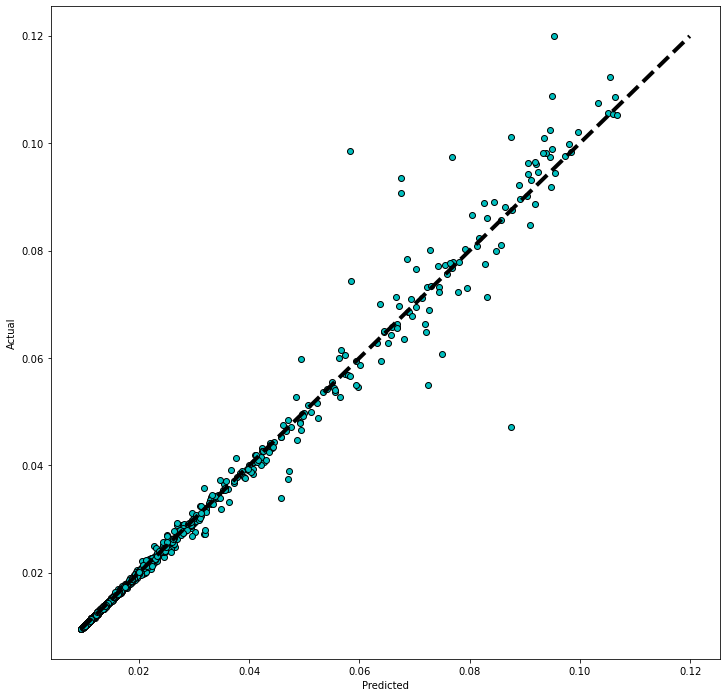

In [11]:
##* Plotting testing datasets vs. predicted datasets
vsplot, ax = plt.subplots(1, 1, figsize=(12,12))
ax.scatter(x = predicted, y = test_data[target], color='c', edgecolors=(0, 0, 0))
ax.plot([test_data[target].min(), test_data[target].max()], [test_data[target].min(), test_data[target].max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


In [12]:
##* Importance of each predictor
vi = pd.DataFrame([clf.feature_importances_], columns=features)
print(vi)


        AOA     Umach        RE  thickness
0  0.414916  0.437809  0.061667   0.085608


In [13]:
##* Performance Evaluation

## Root Mean Squared Error
perf_rmse = np.sqrt(metrics.mean_squared_error(vs['Actual'], vs['Predicted']))
print('*** Root Mean Squared Error = ', perf_rmse)


*** Root Mean Squared Error =  0.0023922907243566346
